In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random purchase data
np.random.seed(1)
purchase_data = pd.DataFrame({
    'customer_id': np.random.randint(1000, size=1000),
    'order_date': pd.date_range('2020-01-01', periods=1000),
    'revenue': np.random.randint(1, 100, size=1000)
})

# Define a function to extract the year and month from a date
def get_month(x):
    return x.strftime('%Y-%m')

# Add a new column with the cohort month for each order
purchase_data['cohort_month'] = purchase_data.groupby('customer_id')['order_date'].transform('min').apply(get_month)

In [2]:
purchase_data

,customer_id,order_date,revenue,cohort_month,cohort_index
0,37,2020-01-01,34,2020-01-01,0
1,235,2020-01-02,96,2020-01-01,0
2,908,2020-01-03,42,2020-01-01,0
3,72,2020-01-04,72,2020-01-01,0
4,767,2020-01-05,70,2020-01-01,0
...,...,...,...,...,...
995,417,2022-09-22,60,2021-03-01,18
996,887,2022-09-23,18,2022-04-01,5
997,166,2022-09-24,23,2020-04-01,29
998,805,2022-09-25,55,2021-11-01,10


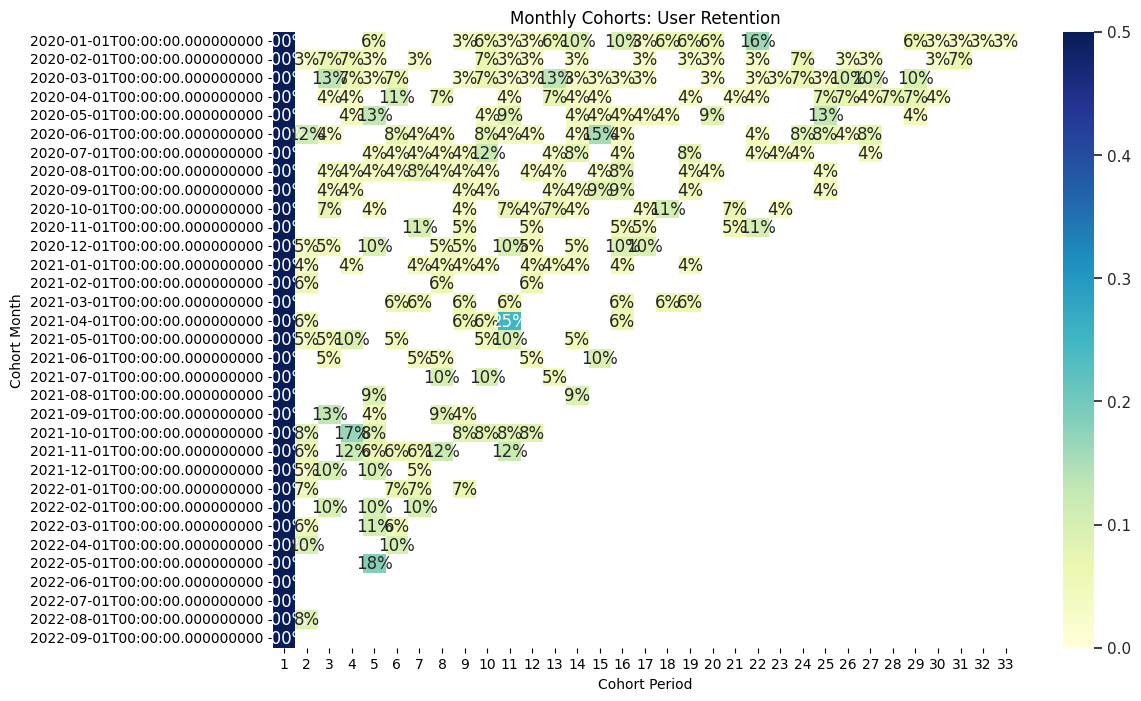

In [1]:
# Define a function to calculate the monthly cohort index
def calculate_cohort_index(df):
    """
    Calculates the cohort index for a given DataFrame.
    """
    # Convert cohort_month to datetime
    df['cohort_month'] = pd.to_datetime(df['cohort_month'])

    # Calculate the difference in months between order_date and cohort_month
    diff = (df['order_date'] - df['cohort_month']) / np.timedelta64(1, 'M')

    # Convert the result to an integer
    return diff.astype(int)

# Calculate the monthly cohort index for each order
purchase_data['cohort_index'] = calculate_cohort_index(purchase_data)

# Calculate the retention rates
cohorts = purchase_data.groupby(['cohort_month', 'cohort_index'])['customer_id'].nunique().reset_index()
cohorts['period_number'] = (cohorts['cohort_index'] + 1)
cohort_counts = cohorts.pivot_table(index='cohort_month', columns='period_number', values='customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Set up the visualization
plt.figure(figsize=(12, 8))
plt.title('Monthly Cohorts: User Retention')
sns.set(style='white')
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0, vmax=0.5)

# Add axis labels
plt.xlabel('Cohort Period')
plt.ylabel('Cohort Month')

# Show the plot
plt.show()